In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

style.use("fivethirtyeight")

In [3]:
df=pd.read_csv('HepatitisCdata.csv')

In [4]:
df


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [5]:
print(df.isnull().sum())


Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


In [6]:
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df = df.drop('Unnamed: 0', axis=1)

print(df.isnull().sum())


Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [7]:
df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})

df['Sex'] = df['Sex'].replace({'m': 0, 'f': 1})


In [8]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,1,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,1,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,1,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [9]:
# Value counts of categorical variables
print(df['Category'].value_counts())
print(df['Sex'].value_counts())

Category
0    540
1     75
Name: count, dtype: int64
Sex
0    377
1    238
Name: count, dtype: int64


In [10]:
col=['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']

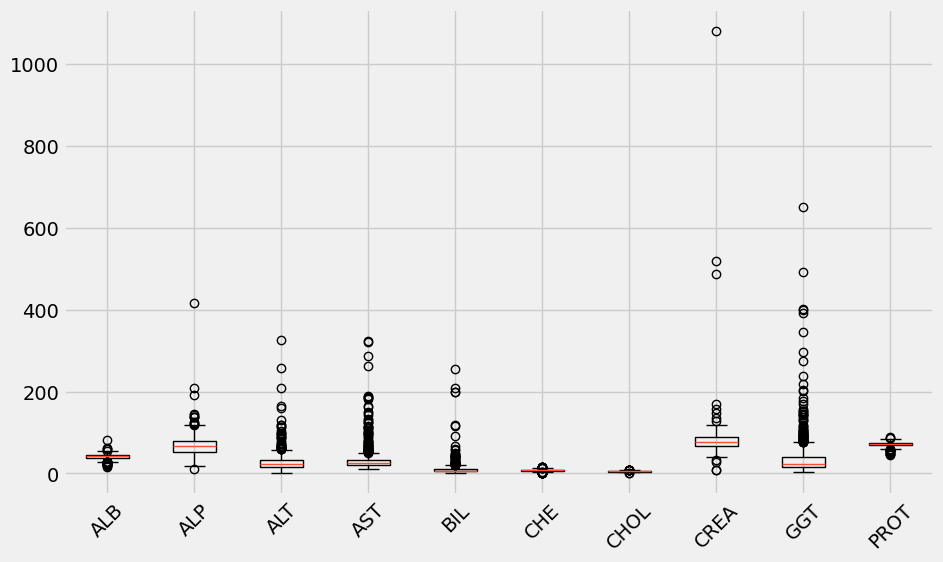

In [11]:
import matplotlib.pyplot as plt

# create a list of the columns to plot
columns_to_plot = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# create a box plot for each column
plt.figure(figsize=(10,6))
plt.boxplot(df[columns_to_plot].values, labels=columns_to_plot, showfliers=True)
plt.xticks(rotation=45)
plt.show()


In [12]:
q_low = df[col].quantile(0.01)
q_hi  = df[col].quantile(0.99)

df_outliers = df[(df[col] < q_low) | (df[col] > q_hi)]
outlier_percentage = (df_outliers.sum() / len(df_outliers)) * 100
print(outlier_percentage)


Category      0.000000
Age         103.089431
Sex           0.000000
ALB          88.829268
ALP         249.382114
ALT         223.723577
AST         300.227642
BIL         195.300813
CHE          19.108943
CHOL         13.222764
CREA        471.544715
GGT         490.926829
PROT        152.943089
dtype: float64


In [13]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
robust_scaler = RobustScaler()

# Define the columns to be scaled using RobustScaler
cols_to_scale = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Scale the selected columns using RobustScaler
df[cols_to_scale] = robust_scaler.fit_transform(df[cols_to_scale])


In [14]:
q_low = df[col].quantile(0.01)
q_hi  = df[col].quantile(0.99)

df_outliers = df[(df[col] < q_low) | (df[col] > q_hi)]
outlier_percentage = (df_outliers.sum() / len(df_outliers)) * 100
print(outlier_percentage)


Category      0.000000
Age         103.089431
Sex           0.000000
ALB           0.040650
ALP           3.701887
ALT          10.292243
AST          21.351176
BIL          30.486427
CHE           0.115138
CHOL          0.790912
CREA         14.107627
GGT          17.872905
PROT         -1.871251
dtype: float64


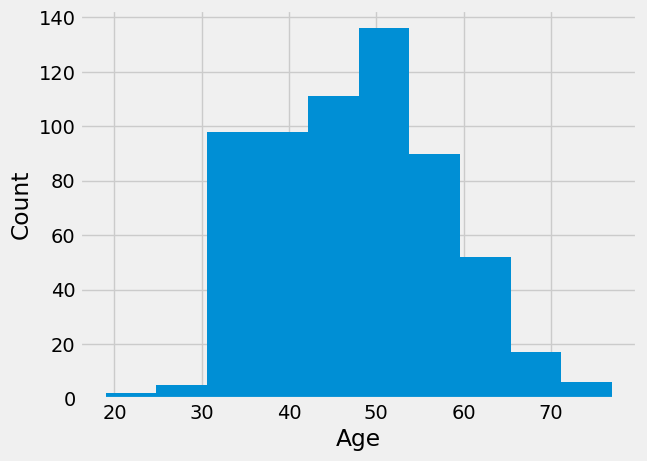

In [15]:
import matplotlib.pyplot as plt

plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


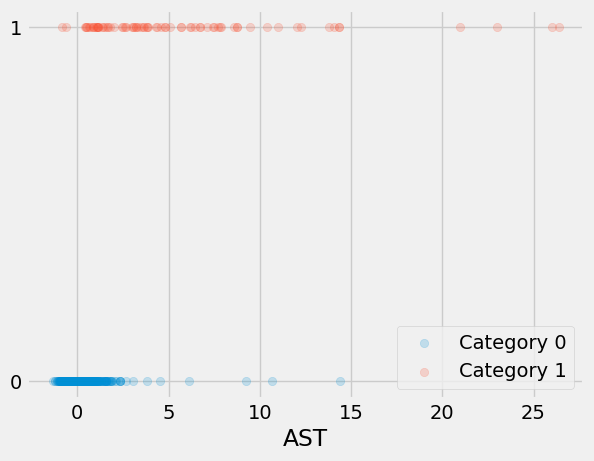

In [16]:
# filter data by category 0 or 1
df_cat0 = df[df['Category']==0]
df_cat1 = df[df['Category']==1]

# plot the scatter plot for category 0 and 1 separately
plt.scatter(df_cat0['AST'], np.zeros_like(df_cat0['AST']), alpha=0.2, label='Category 0')
plt.scatter(df_cat1['AST'], np.zeros_like(df_cat1['AST'])+1, alpha=0.2, label='Category 1')
plt.xlabel('AST')
plt.yticks([0,1])
plt.legend()
plt.show()


Total Suspected Patients : 540 
Total Healthy Patients : 75 


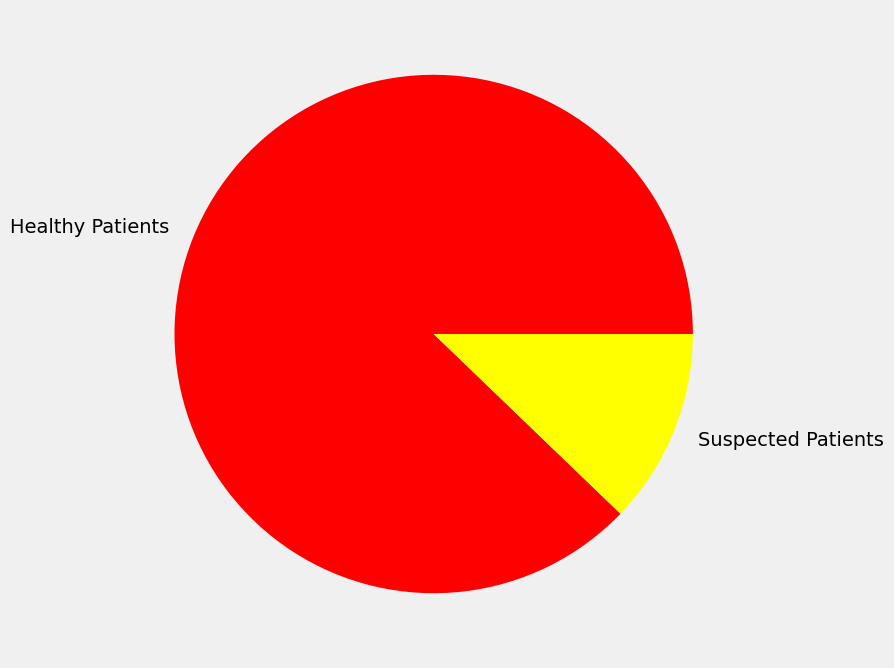

In [17]:
print ('Total Suspected Patients : {} '.format(df.Category.value_counts()[0]))
print ('Total Healthy Patients : {} '.format(df.Category.value_counts()[1]))
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=df["Category"].value_counts(), 
        colors=["red","yellow"], 
        labels=["Healthy Patients","Suspected Patients"], 
        )

plt.show()

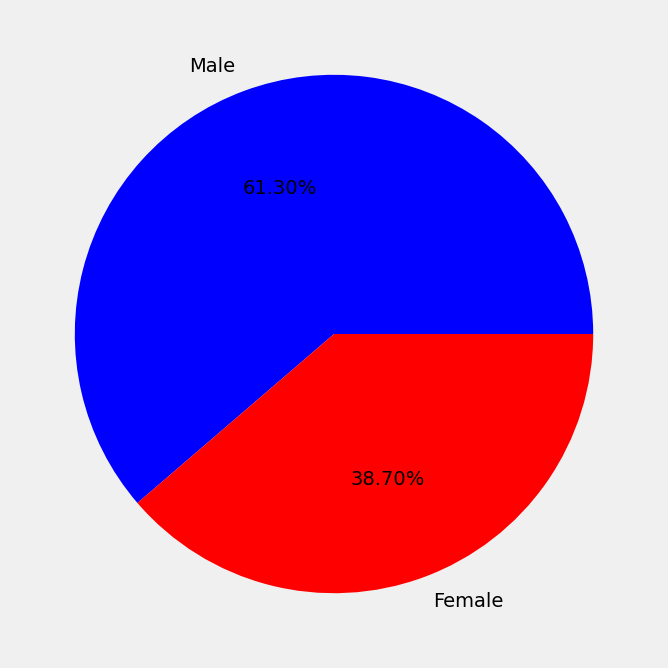

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["Sex"].value_counts(), 
        colors=["blue","red"], 
        labels=["Male","Female"], 
        autopct="%1.2f%%", 
        )
plt.show()

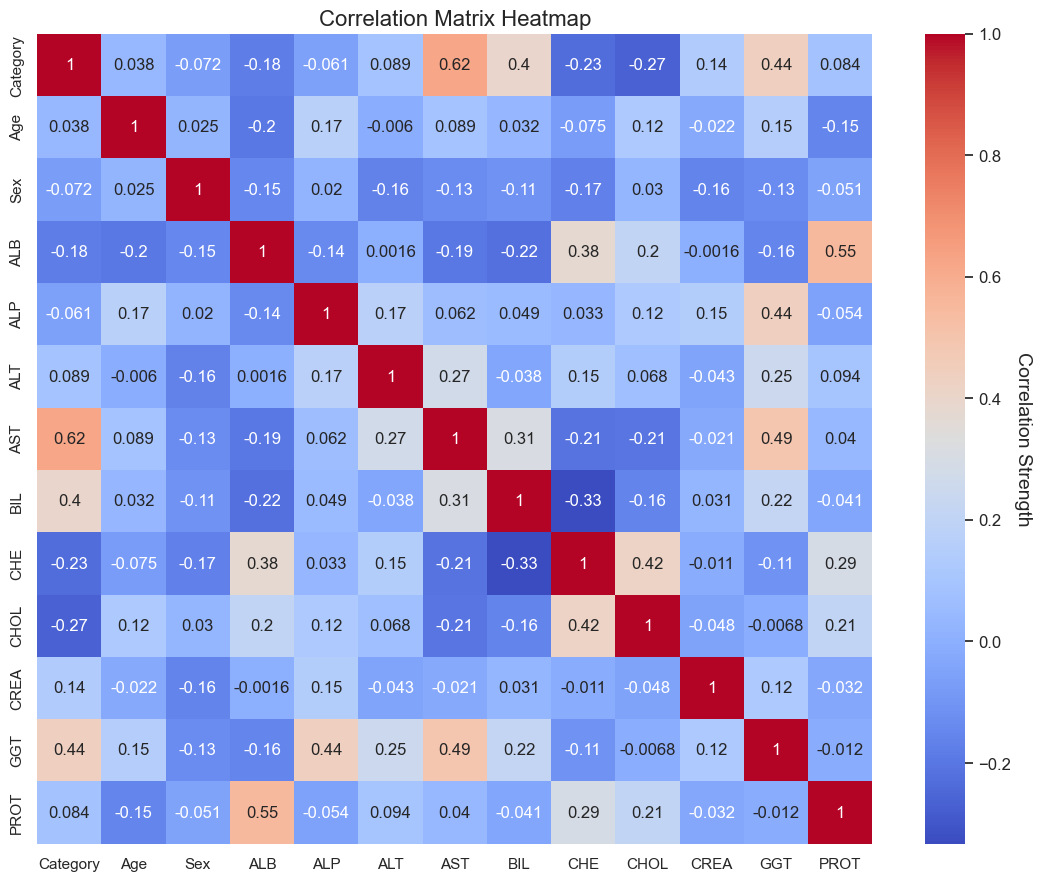

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
plt.title("Correlation Matrix Heatmap", fontsize=16)
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 12}, cmap='coolwarm', ax=ax)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Correlation Strength', rotation=270, fontsize=14, labelpad=15)
plt.show()


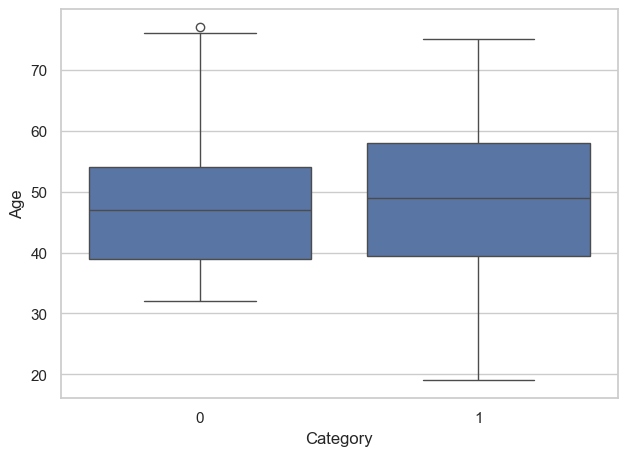

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Category", y="Age", data=df)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

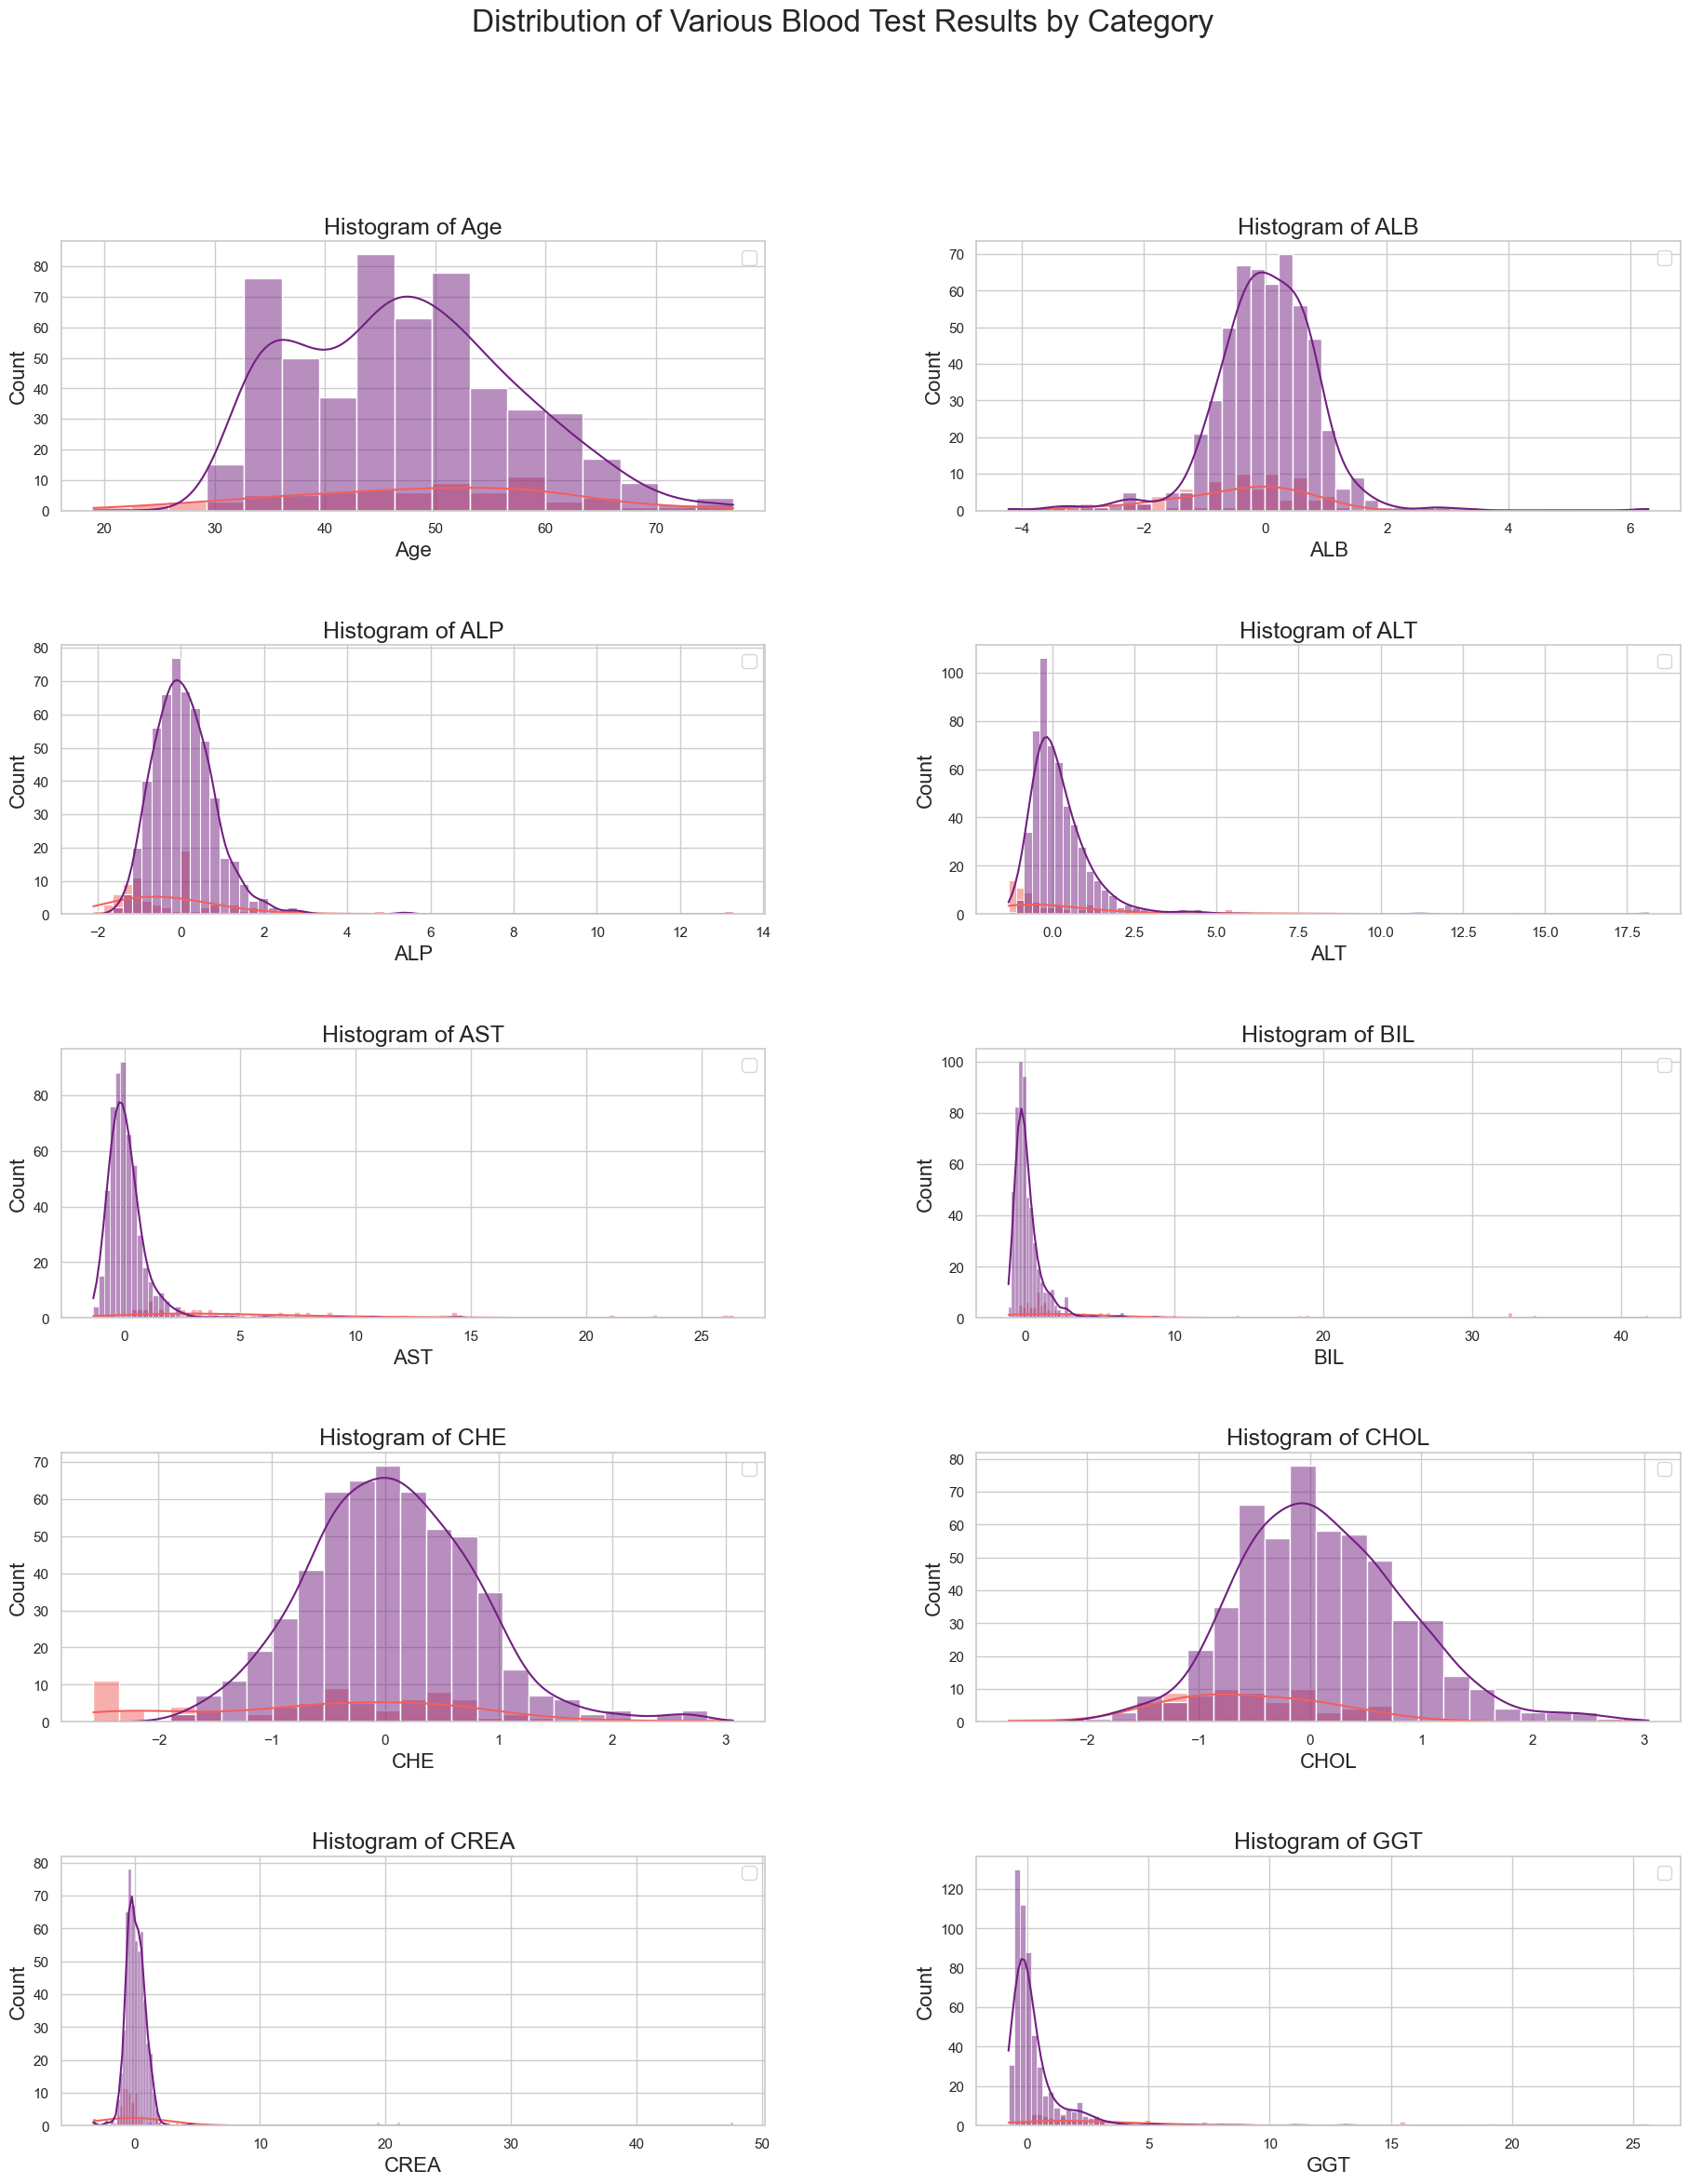

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()

# Define the columns to plot
columns = ["Age", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT"]

# Loop over each column and plot a histogram with multiple categories
for i, col in enumerate(columns):
    sns.histplot(x=df[col], hue=df["Category"], kde=True, palette="magma", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=16)  # increase x-axis label font size
    axes[i].set_ylabel("Count", fontsize=16)  # increase y-axis label font size
    axes[i].set_title(f"Histogram of {col}", fontsize=18)  # increase title font size
    axes[i].legend(fontsize=14)  # increase legend font size

# Add a main title to the figure
fig.suptitle("Distribution of Various Blood Test Results by Category", fontsize=24)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # add more spacing between subplots



In [21]:
from sklearn.model_selection import train_test_split

X = df.drop("Category", axis=1)
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
X

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,0,-0.531250,-0.538899,-0.918919,-0.336283,0.033898,-0.500942,-1.449477,1.380952,-0.457143,-0.524590
1,32,0,-0.531250,0.136622,-0.300300,-0.106195,-0.576271,1.096045,-0.355401,-0.142857,-0.314286,0.704918
2,32,0,0.781250,0.303605,0.792793,2.362832,-0.203390,0.218456,-0.076655,0.428571,0.404082,1.163934
3,32,0,0.203125,-0.557875,0.456456,-0.292035,1.966102,-0.350282,-0.397213,0.142857,0.428571,0.573770
4,32,0,-0.421875,0.280835,0.576577,-0.097345,0.389831,0.335217,-0.689895,-0.047619,0.269388,-0.573770
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,-1.546875,13.278937,-1.027027,7.469027,7.237288,-1.013183,0.689895,-1.014286,25.616327,-0.606557
611,64,1,-2.796875,1.370019,-1.207207,1.637168,2.152542,-2.531073,-1.595819,-0.666667,0.514286,-0.147541
612,64,1,-2.015625,0.781784,-1.171171,6.469027,6.898305,-2.485876,-1.170732,-0.490476,1.669388,1.606557
613,46,1,-1.390625,0.060111,0.960961,3.194690,2.152542,-1.770245,-0.773519,-1.190476,1.089796,-0.196721


In [23]:
import warnings
import joblib

# define a list of models to train and their corresponding hyperparameters to tune
models = [
    {
        "name": "Logistic Regression",
        "estimator": LogisticRegression(),
        "hyperparameters": {
            "penalty": ["l2"],
            "C": [0.01, 0.1, 1, 10],
            "max_iter": [500]
        }
    },
    {
        "name": "Random Forest",
        "estimator": RandomForestClassifier(),
        "hyperparameters": {
            "n_estimators": [100, 200, 300],
            "max_depth": [5, 10, 20, None]
        }
    },
    {
        "name": "Gradient Boosting",
        "estimator": GradientBoostingClassifier(),
        "hyperparameters": {
            "n_estimators": [100, 200, 300],
            "learning_rate": [0.01, 0.1, 1],
            "max_depth": [3, 5, 10]
        }
    },
    {
        "name": "Support Vector Machine",
        "estimator": SVC(),
        "hyperparameters": {
            "C": [0.01, 0.1, 1, 10],
            "kernel": ["linear", "rbf", "sigmoid"],
            "gamma": ["scale", "auto"]
        }
    }

]

# train and tune each model
accuracies = []
best_models = {}
for model in models:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        print(f"Training {model['name']}...")
        grid_search = GridSearchCV(
            estimator=model['estimator'],
            param_grid=model['hyperparameters'],
            scoring='accuracy',
            cv=5
        )
        grid_search.fit(X_train, y_train)

        # evaluate the model's performance
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        accuracies.append((model['name'], accuracy))
        best_models[model['name']] = best_model

        print(f"Best parameters for {model['name']}: {grid_search.best_params_}")
        print(f"Accuracy for {model['name']}: {accuracy}")



Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 500, 'penalty': 'l2'}
Accuracy for Logistic Regression: 0.9024390243902439
Training Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 300}
Accuracy for Random Forest: 0.926829268292683
Training Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Accuracy for Gradient Boosting: 0.9349593495934959
Training Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy for Support Vector Machine: 0.9024390243902439


In [25]:
# create the Logistic Regression model with the best hyperparameters
log_reg_model = LogisticRegression(
    C=10,
    max_iter=500,
    penalty='l2'
)

# create the Random Forest model with the best hyperparameters
rf_model = RandomForestClassifier(
    max_depth=10,
    n_estimators=300
)

# create the Gradient Boosting model with the best hyperparameters
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100
)

# create the Support Vector Machine model with the best hyperparameters
svm_model = SVC(
    C=10,
    gamma='scale',
    kernel='linear'
)

In [26]:
# train the Logistic Regression model on the training data
log_reg_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_log_reg = log_reg_model.predict(X_test)

# train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# train the Gradient Boosting model on the training data
gb_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_gb = gb_model.predict(X_test)

# train the Support Vector Machine model on the training data
svm_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_svm = svm_model.predict(X_test)


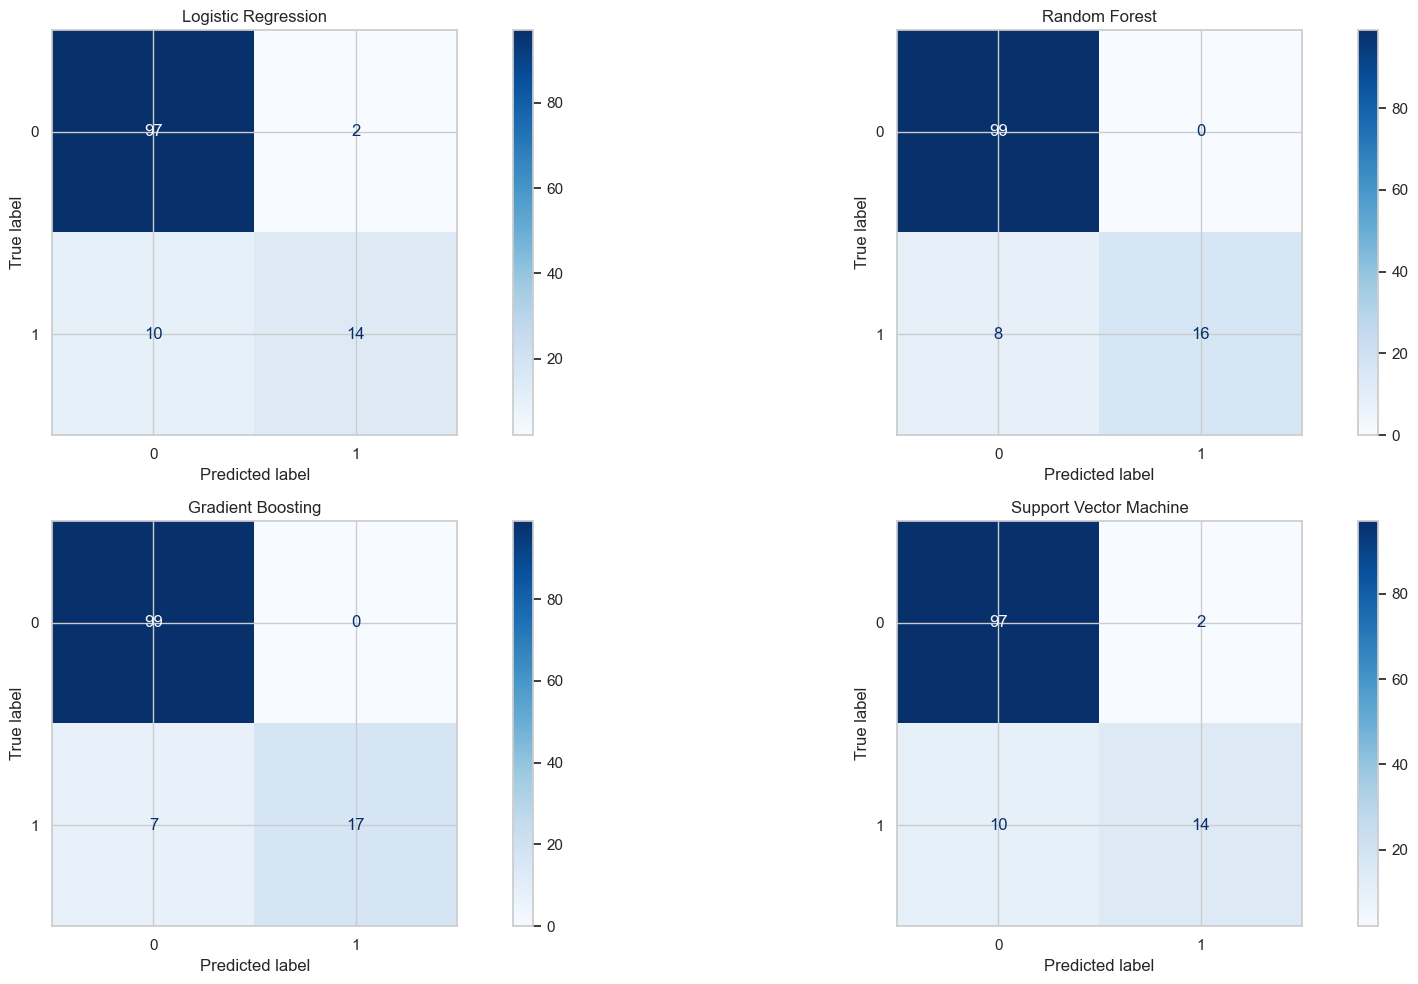

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# define the models and their names
models = {
    'Logistic Regression': log_reg_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Support Vector Machine': svm_model
}

# create a subplot grid with 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# iterate over the models and plot the confusion matrix in the corresponding subplot
for i, (name, model) in enumerate(models.items()):
    row = i // 2
    col = i % 2
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', ax=axs[row, col])
    disp.ax_.set_title(name)

plt.tight_layout()
plt.show()


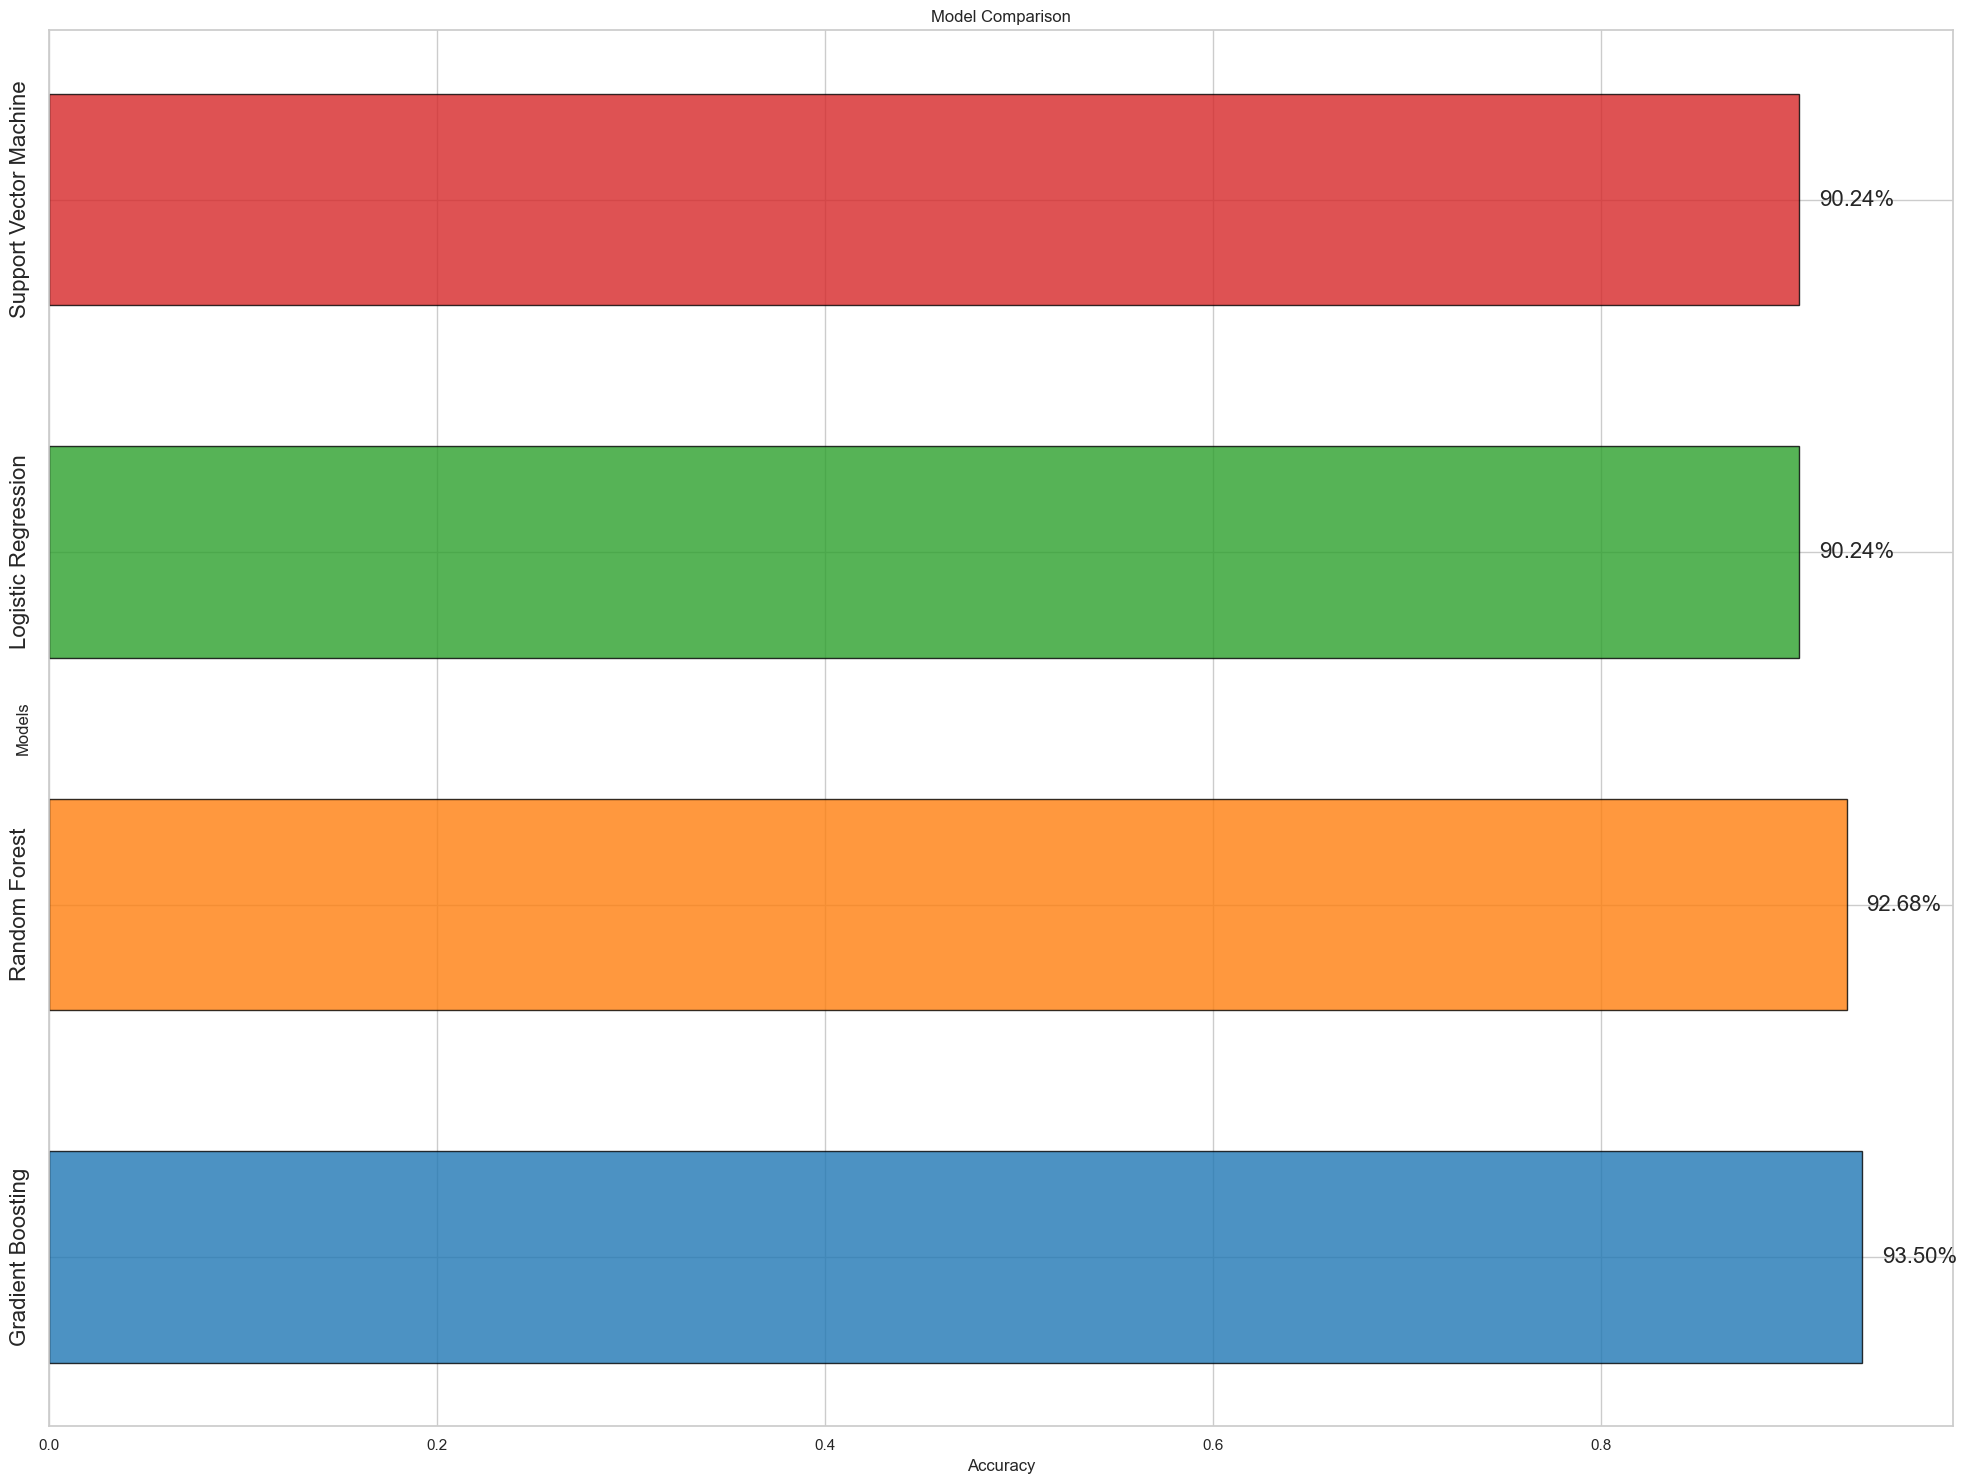

In [28]:
import matplotlib.pyplot as plt

# Sort accuracies in descending order
accuracies.sort(key=lambda x: x[1], reverse=True)

# Extract model names and accuracies
names, values = zip(*accuracies)

# Set color scheme
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Create bar chart
fig, ax = plt.subplots(figsize=(20, 15))
ax.barh(range(len(names)), values, color=colors, edgecolor='black', height=0.6, alpha=0.8, capsize=5, tick_label='')

# Add labels to the bars
for i, (name, acc) in enumerate(zip(names, values)):
    ax.text(acc + 0.01, i, f"{acc:.2%}", ha='left', va='center', fontsize=16)
    ax.text(-0.01, i, name, ha='right', va='center', fontsize=16, rotation=90)

# Set axis labels and title
ax.set_xlabel('Accuracy')
ax.set_ylabel('Models')
ax.set_title('Model Comparison')


# Adjust layout and save plot
plt.subplots_adjust(left=0.3)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)
plt.show()


In [29]:
accuracy = gb_model.score(X_test, y_test)
print(f"Accuracy of gb_model: {accuracy:.2f}")


Accuracy of gb_model: 0.94


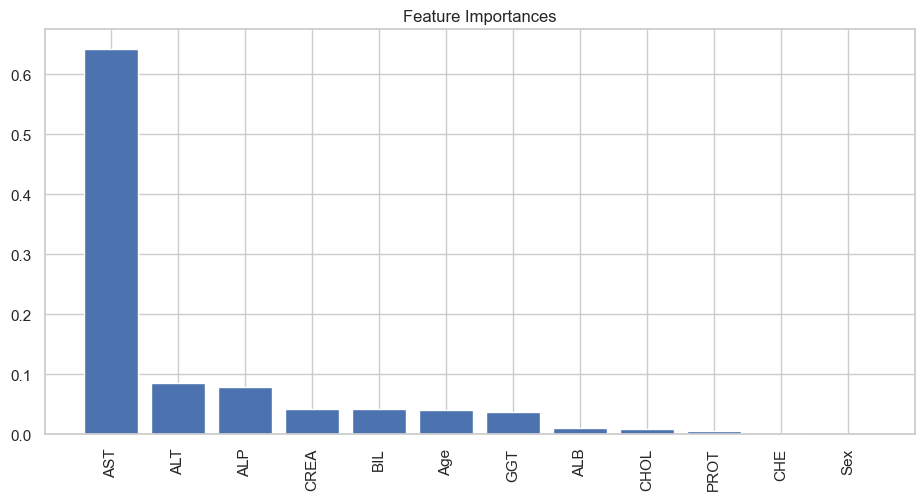

In [30]:
import matplotlib.pyplot as plt

# fit the model
gb_model.fit(X_train, y_train)

# get feature importances
importances = gb_model.feature_importances_

# get feature names
feature_names = X.columns

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# plot feature importances
plt.figure(figsize=(10,5))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), feature_names[indices], rotation='vertical')
plt.show()


In [31]:
import joblib

# Save the trained model
joblib.dump(gb_model, 'hepititisc_model.sav')

['hepititisc_model.sav']

In [34]:
# Load the model
loaded_model = joblib.load('hepititisc_model.sav')

# Make a prediction
new_data = [[32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0]]
prediction = loaded_model.predict(new_data)

print(prediction)  # Will output the prediction class (e.g., 1 or 0)


[1]


C:\Users\manoj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [31]:
import pickle
best_model=gb_model
# save the model to disk
with open('gb_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
